In [1]:
import pandas as pd

# panggil dataset
data = pd.read_csv('adm_data.csv')

# tampilkan untuk melihat isi data
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


(None,
    Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
 0           1        337          118                  4  4.5   4.5  9.65   
 1           2        324          107                  4  4.0   4.5  8.87   
 2           3        316          104                  3  3.0   3.5  8.00   
 3           4        322          110                  3  3.5   2.5  8.67   
 4           5        314          103                  2  2.0   3.0  8.21   
 
    Research  Chance of Admit   
 0         1              0.92  
 1         1              0.76  
 2         1              0.72  
 3         1              0.80  
 4         0              0.65  )

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Drop the Serial No. kolom 
data_cleaned = data.drop(columns=['Serial No.'])


X = data_cleaned.drop(columns=['Chance of Admit '])
y = data_cleaned['Chance of Admit ']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# jalakan dan evaluasi models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MAE': mae, 'R² Score': r2}

results


{'Linear Regression': {'MAE': 0.04795673362091195,
  'R² Score': 0.8212082591486992},
 'Decision Tree': {'MAE': 0.066125, 'R² Score': 0.6331325501680588},
 'Random Forest': {'MAE': 0.04977500000000004, 'R² Score': 0.8066077140670239},
 'Gradient Boosting': {'MAE': 0.05017360753961357,
  'R² Score': 0.7955016837912755}}

Mean Absolute Error (MAE) dan R² Score adalah dua metrik yang umum digunakan untuk mengevaluasi kinerja model regresi.


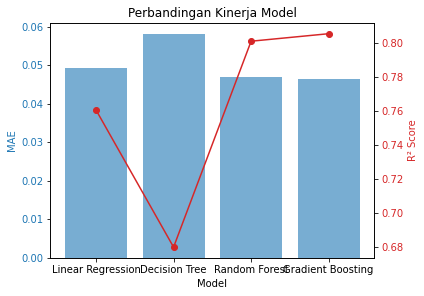

In [7]:
import matplotlib.pyplot as plt

# Data hasil
results = {
    'Linear Regression': {'MAE': 0.049232019147868445, 'R² Score': 0.7604353631198713},
    'Decision Tree': {'MAE': 0.05803883495145632, 'R² Score': 0.6798544095371746},
    'Random Forest': {'MAE': 0.04697961165048544, 'R² Score': 0.8009189807938318},
    'Gradient Boosting': {'MAE': 0.04651019417434207, 'R² Score': 0.8053259574243173}
}

# Ekstraksi data
nama_model = list(results.keys())
nilai_mae = [results[model]['MAE'] for model in nama_model]
nilai_r2 = [results[model]['R² Score'] for model in nama_model]

# Plot
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Model')
ax1.set_ylabel('MAE', color=color)
ax1.bar(nama_model, nilai_mae, color=color, alpha=0.6, label='MAE')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('R² Score', color=color)
ax2.plot(nama_model, nilai_r2, color=color, marker='o', label='R² Score')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Perbandingan Kinerja Model')
plt.show()


code dibawah ini akan dilakukan pencarian faktor apa saja yang bisa meningkatkan akan peluang diterimanya

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Menghapus kolom Serial No.
data_cleaned = data.drop(columns=['Serial No.'])

# Memisahkan fitur dan variabel target
X = data_cleaned.drop(columns=['Chance of Admit '])
y = data_cleaned['Chance of Admit ']

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menginisialisasi dan melatih model Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Mengekstrak koefisien
coefficients = model.coef_
feature_names = X.columns

# Membuat DataFrame untuk menampilkan koefisien dengan nama fiturnya
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Mengurutkan DataFrame berdasarkan nilai absolut koefisien secara menurun
coef_df['Absolute Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Absolute Coefficient', ascending=False)

# Menampilkan DataFrame
print(coef_df)


             Feature  Coefficient  Absolute Coefficient
5               CGPA     0.114669              0.114669
6           Research     0.022227              0.022227
4               LOR      0.015770              0.015770
2  University Rating     0.007377              0.007377
1        TOEFL Score     0.002724              0.002724
0          GRE Score     0.001863              0.001863
3                SOP    -0.000293              0.000293


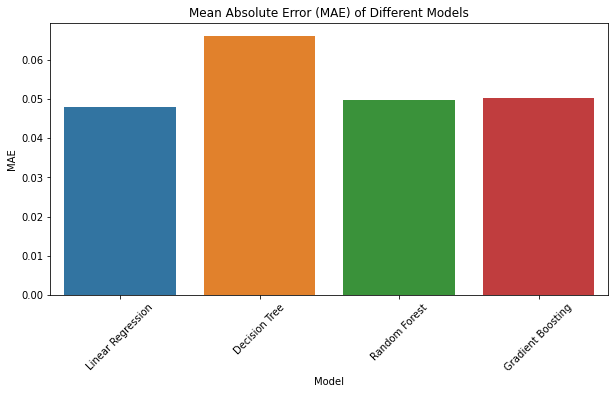

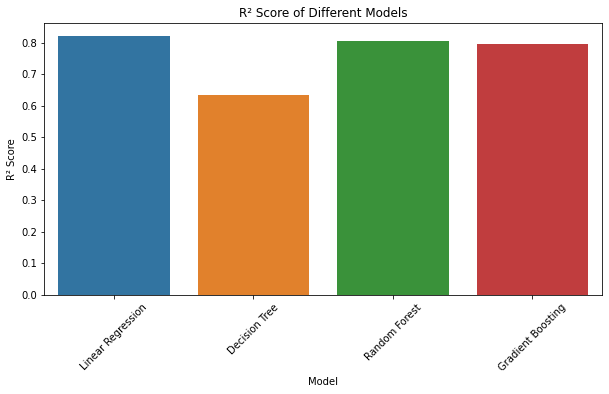

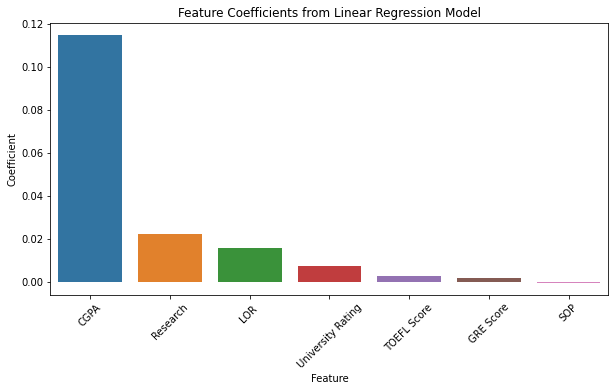

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hasil evaluasi model
results = {
    'Linear Regression': {'MAE': 0.047956733620911976, 'R² Score': 0.8212082591486993},
    'Decision Tree': {'MAE': 0.066125, 'R² Score': 0.6331325501680588},
    'Random Forest': {'MAE': 0.04977500000000004, 'R² Score': 0.8066077140670239},
    'Gradient Boosting': {'MAE': 0.05017360753961357, 'R² Score': 0.7955016837912755}
}

#Hasil konvert dataframe ke visualisasi
results_df = pd.DataFrame(results).T.reset_index()
results_df = results_df.rename(columns={'index': 'Model'})

# Plot MAE
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='MAE', data=results_df)
plt.title('Mean Absolute Error (MAE) of Different Models')
plt.ylabel('MAE')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

# Plot R² Score
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='R² Score', data=results_df)
plt.title('R² Score of Different Models')
plt.ylabel('R² Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

# Koefisien fitur dari model Linear Regression
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df['Absolute Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Absolute Coefficient', ascending=False)

# Plot 
plt.figure(figsize=(10, 5))
sns.barplot(x='Feature', y='Coefficient', data=coef_df)
plt.title('Feature Coefficients from Linear Regression Model')
plt.ylabel('Coefficient')
plt.xlabel('Feature')
plt.xticks(rotation=45)
plt.show()


dibawah ini menggunakan algoritma tambnahan yaitu

1.Ridge regression : https://www.ibm.com/topics/ridge-regression#:~:text=Ridge%20regression%20is%20a%20statistical,regularization%20for%20linear%20regression%20models.

2.Lasso Regression : https://www.ibm.com/topics/lasso-regression
        
untuk informasi lebih lanjut bisa diakses link yang sudah tertera diatas.

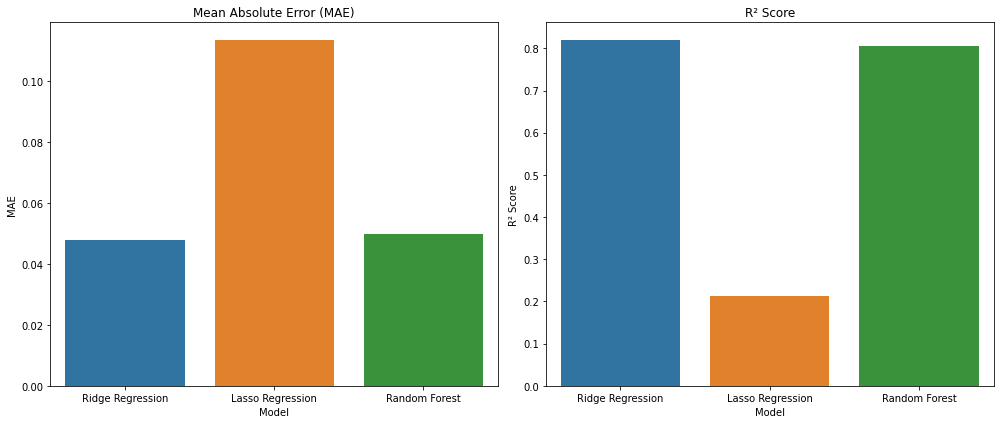

,MAE,R² Score
Ridge Regression,0.048032,0.820434
Lasso Regression,0.113683,0.212258
Random Forest,0.049775,0.806608


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Model-model yang dipilih
selected_models = {
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Kamus untuk menyimpan hasil
results = {}

# Evaluasi model yang dipilih
for model_name, model in selected_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MAE': mae, 'R² Score': r2}

# Mengonversi hasil ke DataFrame untuk memudahkan plot
import pandas as pd
results_df = pd.DataFrame(results).T

# Plot hasilnya
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot MAE
sns.barplot(x=results_df.index, y='MAE', data=results_df, ax=axes[0])
axes[0].set_title('Mean Absolute Error (MAE)')
axes[0].set_ylabel('MAE')
axes[0].set_xlabel('Model')

# Plot R² Score
sns.barplot(x=results_df.index, y='R² Score', data=results_df, ax=axes[1])
axes[1].set_title('R² Score')
axes[1].set_ylabel('R² Score')
axes[1].set_xlabel('Model')

plt.tight_layout()
plt.show()

# Menampilkan hasil
results_df
